In [ ]:
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cargar dataset con todas las estaciones, definir la fecha como índice del dataframe

# Ruta acceso directo
path = '/content/drive/MyDrive/datoscsv/'
#path='/content/drive/MyDrive/IABD_Proyecto/IABD_PRJ_Dev_PeakyBlinders/datoscsv/'

df = pd.read_csv(path + 'airWeather_2013-2019_v2.csv', sep=';', index_col='FECHA', parse_dates=['FECHA'])
#  df = pd.read_csv(path + 'airWeather_2013-2019_v2.csv', sep=';')

# Volver a recuperar la fecha como campo
df.insert(0, 'FECHA', df.index.strftime('%Y-%m-%d'))

In [ ]:
df

,FECHA,COD_ESTACION,NOM_ESTACION,SO2,NO,NO2,NOx,O3,PM10,PM2.5,lluvias,Temp,VelocVent,VelocVentMax,HoraRacha,TempMax,TempMin
0,2013-01-01,46250043,VALÈNCIA VIVERS,1.0,5.0,30.0,39.0,27.0,6.0,5.0,0.0,13.70,0.6,5.5,NaN,32.1,16.1
1,2013-01-02,46250043,VALÈNCIA VIVERS,6.0,83.0,85.0,211.0,16.0,18.0,6.0,0.0,11.40,0.6,3.6,NaN,32.1,16.1
2,2013-01-03,46250043,VALÈNCIA VIVERS,3.0,32.0,69.0,117.0,16.0,18.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,46250043,VALÈNCIA VIVERS,4.0,50.0,79.0,156.0,12.0,19.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,46250043,VALÈNCIA VIVERS,3.0,47.0,75.0,147.0,9.0,22.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,2019-12-27,46250048,VALÈNCIA MOLÍ DEL SOL,3.0,21.0,26.0,58.0,16.0,36.0,33.0,0.0,13.55,7.0,14.0,10:00:00,18.7,8.4
10220,2019-12-28,46250048,VALÈNCIA MOLÍ DEL SOL,3.0,15.0,23.0,46.0,17.0,40.0,38.0,0.0,10.55,9.0,16.0,06:50:00,15.4,5.7
10221,2019-12-29,46250048,VALÈNCIA MOLÍ DEL SOL,3.0,6.0,18.0,27.0,27.0,41.0,40.0,0.0,11.75,8.0,16.0,12:00:00,16.0,7.5
10222,2019-12-30,46250048,VALÈNCIA MOLÍ DEL SOL,3.0,18.0,23.0,50.0,21.0,40.0,37.0,0.0,9.90,0.4,3.5,NaN,16.0,7.5


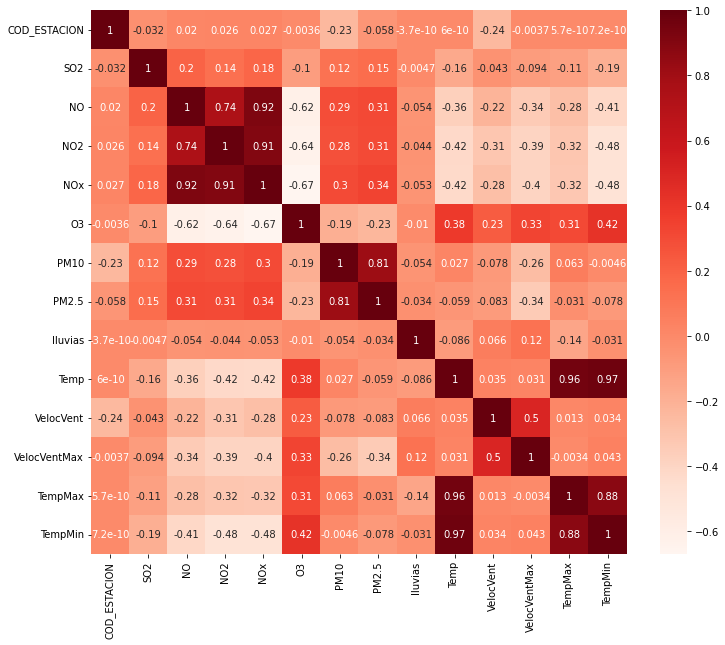

In [ ]:
# estudiar correlación de una estación en particular para probar
df2 = df[df['COD_ESTACION']==46250043]

# eliminamos algunos campos antes de calcular la correlación
df2 = df2.drop(['COD_ESTACION', 'VelocVentMax', 'TempMax', 'TempMin'], axis=1)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
correlacion = df.corr() #Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
sns.heatmap(correlacion, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["PM2.5"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


PM10     0.812396
PM2.5    1.000000
Name: PM2.5, dtype: float64


In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["PM10"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


PM10     1.000000
PM2.5    0.812396
Name: PM10, dtype: float64


In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["O3"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


NO         0.616775
NO2        0.636552
NOx        0.670267
O3         1.000000
TempMin    0.419521
Name: O3, dtype: float64


In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["NO"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


NO         1.000000
NO2        0.743686
NOx        0.919561
O3         0.616775
TempMin    0.414373
Name: NO, dtype: float64


In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["Temp"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


NO2        0.420031
NOx        0.422339
Temp       1.000000
TempMax    0.958530
TempMin    0.968962
Name: Temp, dtype: float64


In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["NO2"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


NO         0.743686
NO2        1.000000
NOx        0.907148
O3         0.636552
Temp       0.420031
TempMin    0.481416
Name: NO2, dtype: float64


In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["NOx"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


NO         0.919561
NO2        0.907148
NOx        1.000000
O3         0.670267
Temp       0.422339
TempMin    0.481157
Name: NOx, dtype: float64


In [ ]:
#Correlación con la variable target
cor_target = abs(correlacion["VelocVent"])
#¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.4]
print(relevant_features)


VelocVent       1.000000
VelocVentMax    0.501502
Name: VelocVent, dtype: float64


In [ ]:
# Se decide eliminar del dataset las columnas que no aportan valor
df = df.drop(['VelocVentMax', 'TempMax', 'TempMin', 'HoraRacha'], axis=1)

In [ ]:
# Escribir csv 
df.to_csv(path + 'airWeather_2013-2019_v3.csv', header=True, sep=';', index=False)